In [11]:
from pathlib import Path
import sys
import subprocess

# Repo root (assumes you run this notebook from repo)
REPO = Path.cwd()

# Point this at the GOA GAF you downloaded (keep it gzipped)
GAF_GZ = REPO / 'artefacts_local' / 'artefacts' / 'external' / 'goa_uniprot_all.gaf.216.gz'

TRAIN_FASTA = REPO / 'Train' / 'train_sequences.fasta'
TEST_FASTA = REPO / 'Test' / 'testsuperset.fasta'

# We generate two artefacts:
# 1) IEA-only (safe “no-kaggle” electronic features)
# 2) All evidence codes (richer signal; you can still split by evidence downstream)
OUT_GOA_IEA = REPO / 'artefacts_local' / 'artefacts' / 'external' / 'goa_filtered_iea.tsv.gz'
OUT_GOA_ALL = REPO / 'artefacts_local' / 'artefacts' / 'external' / 'goa_filtered_all.tsv.gz'

print('Python:', sys.executable)
print('GAF_GZ:', GAF_GZ)
print('OUT_GOA_IEA:', OUT_GOA_IEA)
print('OUT_GOA_ALL:', OUT_GOA_ALL)
assert TRAIN_FASTA.exists(), TRAIN_FASTA
assert TEST_FASTA.exists(), TEST_FASTA

Python: c:\Users\Olale\miniconda3\python.exe
GAF_GZ: c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_uniprot_all.gaf.216.gz
OUT_GOA_IEA: c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_filtered_iea.tsv.gz
OUT_GOA_ALL: c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_filtered_all.tsv.gz


## (Optional) Download GOA GAF locally
This is a large download. Keep it compressed (`.gz`).

If you already have the file, skip this cell.

In [3]:
# Set to True only if you explicitly want to download here
DOWNLOAD = True
URL_GOA = 'http://ftp.ebi.ac.uk/pub/databases/GO/goa/old/UNIPROT/goa_uniprot_all.gaf.216.gz'

if DOWNLOAD:
    import requests
    GAF_GZ.parent.mkdir(parents=True, exist_ok=True)
    if GAF_GZ.exists():
        print('Already exists:', GAF_GZ)
    else:
        print('Downloading (streaming):', URL_GOA)
        with requests.get(URL_GOA, stream=True) as r:
            r.raise_for_status()
            with open(GAF_GZ, 'wb') as f:
                for chunk in r.iter_content(chunk_size=1024 * 1024):
                    if chunk:
                        f.write(chunk)
        print('Done:', GAF_GZ, f'{GAF_GZ.stat().st_size/(1024**3):.2f} GiB')
else:
    print('DOWNLOAD=False (skipping)')

Done: c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_uniprot_all.gaf.216.gz 16.64 GiB
Done: c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_uniprot_all.gaf.216.gz 16.64 GiB


## Build filtered features (IEA-only)
This runs the repo script `scripts/01_build_goa_features.py` and writes a compressed TSV filtered to only CAFA proteins.

In [8]:
# Build filtered GOA features using the repo script (two outputs)
SCRIPT = REPO / 'scripts' / '01_build_goa_features.py'
if not SCRIPT.exists():
    raise FileNotFoundError(f'Missing script: {SCRIPT}')

if not GAF_GZ.exists():
    raise FileNotFoundError(f'Missing GAF_GZ: {GAF_GZ} (download it first or change the path)')

OUT_GOA_IEA.parent.mkdir(parents=True, exist_ok=True)

def run_build(out_path, extra_args):
    cmd = [
        sys.executable, str(SCRIPT),
        '--gaf-gz', str(GAF_GZ),
        '--train-fasta', str(TRAIN_FASTA),
        '--test-fasta', str(TEST_FASTA),
        '--out', str(out_path),
    ] + list(extra_args)
    print('Running:')
    print('  ' + ' '.join(cmd))
    subprocess.run(cmd, check=True)

# 1) IEA-only (recommended default artefact for Kaggle use)
run_build(OUT_GOA_IEA, ['--only-iea'])

# 2) All evidence codes (richer signal; still CAFA-filtered)
run_build(OUT_GOA_ALL, [])

Running:
  c:\Users\Olale\miniconda3\python.exe c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\scripts\01_build_goa_features.py --gaf-gz c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_uniprot_all.gaf.216.gz --train-fasta c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\Train\train_sequences.fasta --test-fasta c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\Test\testsuperset.fasta --out c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_filtered_iea.tsv.gz --only-iea
Running:
  c:\Users\Olale\miniconda3\python.exe c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\scripts\01_build_goa_features.py --gaf-gz c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_uniprot_all.gaf.216.gz --

In [9]:
# Quick sanity checks
import gzip

for p in [OUT_GOA_IEA, OUT_GOA_ALL]:
    assert p.exists(), p
    print('\nWrote:', p)
    print('Size:', f'{p.stat().st_size/(1024**3):.2f} GiB')
    with gzip.open(p, 'rt', encoding='utf-8') as f:
        for _ in range(5):
            print(f.readline().rstrip())


Wrote: c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_filtered_iea.tsv.gz
Size: 0.01 GiB
EntryID	term	evidence
A0JN41	GO:0008270	IEA
A0JN41	GO:0004089	IEA
Q5R8N4	GO:0032456	IEA
Q5R8N4	GO:0005768	IEA

Wrote: c:\Users\Olale\Documents\Codebase\Science\cafa-6-protein-function-prediction\artefacts_local\artefacts\external\goa_filtered_all.tsv.gz
Size: 0.01 GiB
EntryID	term	evidence
A0JN41	GO:0016836	IBA
A0JN41	GO:0006730	IBA
A0JN41	GO:0008270	IEA
A0JN41	GO:0004089	IEA


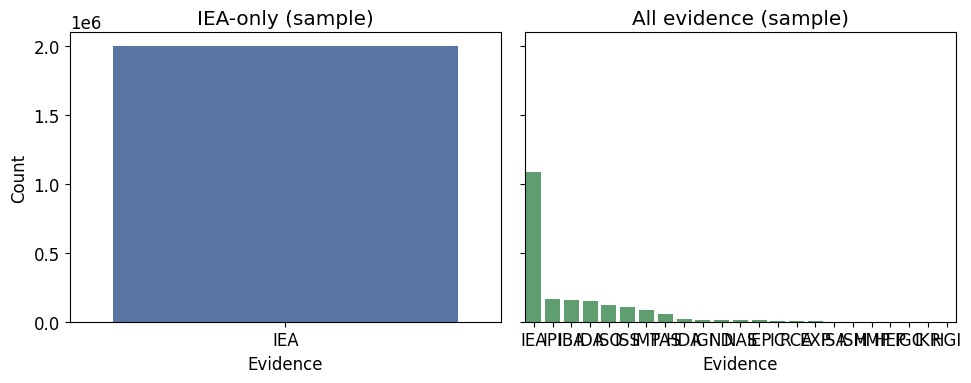

Unique proteins in sample (IEA): 186815
Unique proteins in sample (ALL): 105956


In [12]:
# Evidence-code distribution (what extra signal did ALL add?)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['font.size'] = 12

def load_head(path, nrows=2_000_000):
    # Read a sample (TSV is already CAFA-filtered; sampling keeps this quick)
    return pd.read_csv(path, sep='\t', compression='gzip', nrows=nrows)

df_all = load_head(OUT_GOA_ALL)
df_iea = load_head(OUT_GOA_IEA)

counts_all = df_all['evidence'].value_counts().reset_index()
counts_all.columns = ['evidence', 'count']
counts_iea = df_iea['evidence'].value_counts().reset_index()
counts_iea.columns = ['evidence', 'count']

fig, axes = plt.subplots(1, 2, sharey=True)
sns.barplot(data=counts_iea, x='evidence', y='count', ax=axes[0], color='#4C72B0')
axes[0].set_title('IEA-only (sample)')
axes[0].set_xlabel('Evidence')
axes[0].set_ylabel('Count')

sns.barplot(data=counts_all, x='evidence', y='count', ax=axes[1], color='#55A868')
axes[1].set_title('All evidence (sample)')
axes[1].set_xlabel('Evidence')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print('Unique proteins in sample (IEA):', df_iea['EntryID'].nunique())
print('Unique proteins in sample (ALL):', df_all['EntryID'].nunique())

File: goa_filtered_iea.tsv.gz | size=0.007 GiB
File: goa_filtered_all.tsv.gz | size=0.013 GiB

Rows (IEA-only): 2,275,825
Evidence counts (IEA-only): {'IEA': 2275825}

Rows (ALL): 4,197,194
Evidence counts (ALL): {'IEA': 2275825, 'IPI': 341932, 'IBA': 328226, 'IDA': 312888, 'ISO': 249230, 'ISS': 219933, 'IMP': 171926, 'TAS': 123868, 'HDA': 44444, 'IGI': 32328, 'ND': 29082, 'NAS': 27169, 'IEP': 18808, 'IC': 5558, 'RCA': 3803, 'EXP': 4035, 'ISA': 3004, 'ISM': 2229, 'HMP': 2035, 'HEP': 506, 'IKR': 141, 'IGC': 189, 'HGI': 34, 'HTP': 1}


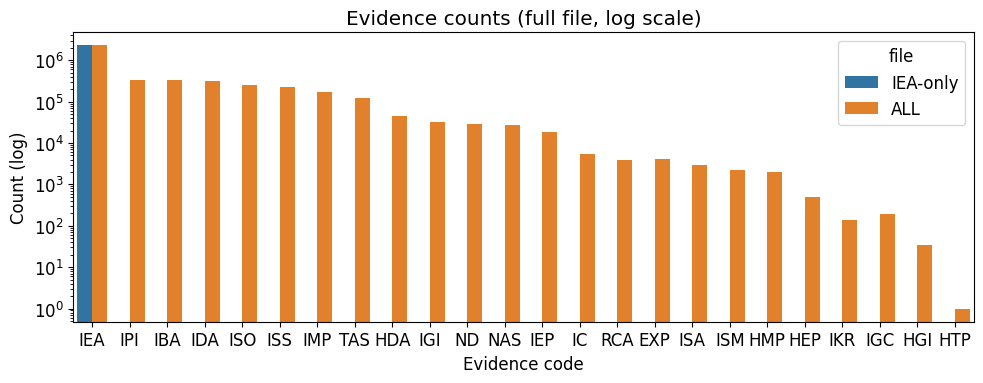

In [14]:
# Full-file (streaming) evidence counts (unbiased vs head sampling)
from collections import Counter
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['font.size'] = 12

def file_gib(p: Path) -> float:
    return p.stat().st_size / (1024**3)

def evidence_counts_stream(path: Path, chunksize: int = 1_000_000) -> tuple[int, Counter]:
    total = 0
    counts = Counter()
    for chunk in pd.read_csv(path, sep='\t', compression='gzip', usecols=['evidence'], chunksize=chunksize):
        total += len(chunk)
        counts.update(chunk['evidence'].value_counts().to_dict())
    return total, counts

for p in [OUT_GOA_IEA, OUT_GOA_ALL]:
    print(f'File: {p.name} | size={file_gib(p):.3f} GiB')

rows_iea, c_iea = evidence_counts_stream(OUT_GOA_IEA)
rows_all, c_all = evidence_counts_stream(OUT_GOA_ALL)

print('\nRows (IEA-only):', f'{rows_iea:,}')
print('Evidence counts (IEA-only):', dict(c_iea))
print('\nRows (ALL):', f'{rows_all:,}')
print('Evidence counts (ALL):', dict(c_all))

df_plot = (
    pd.DataFrame([{'file': 'IEA-only', 'evidence': k, 'count': v} for k, v in c_iea.items()])
    ._append(pd.DataFrame([{'file': 'ALL', 'evidence': k, 'count': v} for k, v in c_all.items()]), ignore_index=True)
)

# Plot on log scale (evidence tails are long)
ax = sns.barplot(data=df_plot, x='evidence', y='count', hue='file')
ax.set_yscale('log')
ax.set_title('Evidence counts (full file, log scale)')
ax.set_xlabel('Evidence code')
ax.set_ylabel('Count (log)')
plt.tight_layout()
plt.show()

## Hand-off to Kaggle
1. Create a Kaggle Dataset containing `goa_filtered_iea.tsv.gz`.
2. Add that Dataset to your Kaggle notebook.
3. In `notebooks/CAFA6_Rank1_Solution.ipynb`, set the external-data path to the mounted file and **do not** parse the full GOA dump on Kaggle.